In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
# frequency_dict = {}

# for i in range(1, 200):
#   frequency_dict[str(i)]= 0

# for index, row in df.iterrows():
#     string_val = row['question_text']
#     # split all the word of the string.
#     words = string_val.split()

#     frequency = len(words)
#     frequency_dict[str(frequency)] += 1

In [ ]:
# print(frequency_dict)

In [ ]:
# values = list(frequency_dict.values())[0:70]

# plt.bar(range(len(frequency_dict))[0:70], values)
# plt.title("Frequency of Words per Question")
# plt.xlabel("Number of Words In Question")
# plt.ylabel("Number of Questions")
# plt.show()

In [ ]:
# TEXT CLEANING FOR PERFORMANCE IMPROVEMENTS
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers (optional)
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text

nltk.download('stopwords')
nltk.download('wordnet')

df['cleaned_text'] = df['question_text'].apply(clean_text)
print(df[['question_text', 'cleaned_text']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             question_text  \
0        How did Quebec nationalists see their province...   
1        Do you have an adopted dog, how would you enco...   
2        Why does velocity affect time? Does velocity a...   
3        How did Otto von Guericke used the Magdeburg h...   
4        Can I convert montra helicon D to a mountain b...   
...                                                    ...   
1306117  What other technical skills do you need as a c...   
1306118  Does MS in ECE have good job prospects in USA ...   
1306119                          Is foam insulation toxic?   
1306120  How can one start a research project based on ...   
1306121  Who wins in a battle between a Wolverine and a...   

                                              cleaned_text  
0                   quebec nationalist see province nation  
1            adopted dog would encourage people adopt shop  
2        velocity affect time velocity affect space geo...  
3          

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# Baseline Models
Logistic Regression, SVM, Random Forest

Models to serve as a benchmark and has faster training


In [ ]:
# import cleaned data
import pandas as pd
df = pd.read_csv('cleaned_data.csv', nrows=10000)
print(df.head())
# df_test = pd.read_csv('test.csv')

                    qid                                      question_text  \
0  00002165364db923c7e6  How did Quebec nationalists see their province...   
1  000032939017120e6e44  Do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  Why does velocity affect time? Does velocity a...   
3  000042bf85aa498cd78e  How did Otto von Guericke used the Magdeburg h...   
4  0000455dfa3e01eae3af  Can I convert montra helicon D to a mountain b...   

   target                                       cleaned_text  
0       0             quebec nationalist see province nation  
1       0      adopted dog would encourage people adopt shop  
2       0  velocity affect time velocity affect space geo...  
3       0        otto von guericke used magdeburg hemisphere  
4       0  convert montra helicon mountain bike changing ...  


In [ ]:
# Logistic Regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()  # or CountVectorizer()
X = vectorizer.fit_transform(df['question_text'])

X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9315
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1862
           1       0.60      0.02      0.04       138

    accuracy                           0.93      2000
   macro avg       0.77      0.51      0.50      2000
weighted avg       0.91      0.93      0.90      2000



In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

vectorizer = TfidfVectorizer()  # or CountVectorizer()
X = vectorizer.fit_transform(df['question_text'])

X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9365
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1862
           1       0.70      0.14      0.23       138

    accuracy                           0.94      2000
   macro avg       0.82      0.57      0.60      2000
weighted avg       0.92      0.94      0.92      2000



In [ ]:
# Random Forest
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

vectorizer = TfidfVectorizer()  # or CountVectorizer()
X = vectorizer.fit_transform(df['question_text'])

X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size=0.2, random_state=42)

# Train the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9325
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1862
           1       0.80      0.03      0.06       138

    accuracy                           0.93      2000
   macro avg       0.87      0.51      0.51      2000
weighted avg       0.92      0.93      0.90      2000



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical

# Parameters
max_words = 10000
max_len = 100

# Tokenization
df = df.dropna(subset=['cleaned_text'])
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# Padding
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(df['target'].values)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 158s 307ms/step - accuracy: 0.9378 - loss: 0.2263 - val_accuracy: 0.9435 - val_loss: 0.1612
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 301ms/step - accuracy: 0.9563 - loss: 0.1165 - val_accuracy: 0.9457 - val_loss: 0.1577
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 302ms/step - accuracy: 0.9731 - loss: 0.0731 - val_accuracy: 0.9413 - val_loss: 0.2179
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9414 - loss: 0.2048
Test Loss: 0.2179, Test Accuracy: 0.9413


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical

# Parameters
max_words = 5000
max_len = 100

# Tokenization
df = df.dropna(subset=['cleaned_text'])
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# Padding
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(np.array(df['target'].values))


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))

# Adjust the output layer based on the number of classes
num_classes = y.shape[1]  # This will give the number of classes from the one-hot encoded labels
model.add(Dense(num_classes, activation='softmax'))  # For multi-class classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=3, batch_size=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9998/9998 ━━━━━━━━━━━━━━━━━━━━ 101s 10ms/step - accuracy: 0.9318 - loss: 0.2994
Epoch 2/3
9998/9998 ━━━━━━━━━━━━━━━━━━━━ 93s 9ms/step - accuracy: 0.9368 - loss: 0.1710
Epoch 3/3
9998/9998 ━━━━━━━━━━━━━━━━━━━━ 93s 9ms/step - accuracy: 0.9364 - loss: 0.1367
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9397 - loss: 0.0944
Test Loss: 0.0958, Test Accuracy: 0.9400


# Hyperparameter Tuning
Custom Loss

In [ ]:
# Custom weight function for LSTM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

df = pd.read_csv('cleaned_data.csv', nrows = 20000)

# Parameters
max_words = 10000
max_len = 100

# Tokenization
df = df.dropna(subset=['cleaned_text'])
df = df.dropna(subset=['target'])
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_text'])
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# Padding
X = pad_sequences(sequences, maxlen=max_len)
y = to_categorical(df['target'].values)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = {0: 1.0, 1: 3.0}  # Give more weight to class 1

# Custom loss function
def weighted_binary_crossentropy(y_true, y_pred):
    # Clip predictions to prevent log(0)
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())

    # Calculate binary crossentropy
    bce = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)

    # Apply weights: multiply BCE by class weights
    weights = tf.where(tf.equal(y_true, 1), class_weights[1], class_weights[0])
    weighted_bce = weights * bce

    return tf.reduce_mean(weighted_bce)

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax', kernel_regularizer=l2(0.1)))

# Compile the model with the custom loss function
model.compile(optimizer='adam', loss=weighted_binary_crossentropy, metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, class_weight=class_weights,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 243ms/step - accuracy: 0.9244 - loss: 0.7375 - val_accuracy: 0.9427 - val_loss: 0.3521
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 247ms/step - accuracy: 0.9524 - loss: 0.3016 - val_accuracy: 0.9455 - val_loss: 0.3349
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 245ms/step - accuracy: 0.9693 - loss: 0.2162 - val_accuracy: 0.9425 - val_loss: 0.3789
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9445 - loss: 0.3120
Test Loss: 0.3349, Test Accuracy: 0.9455


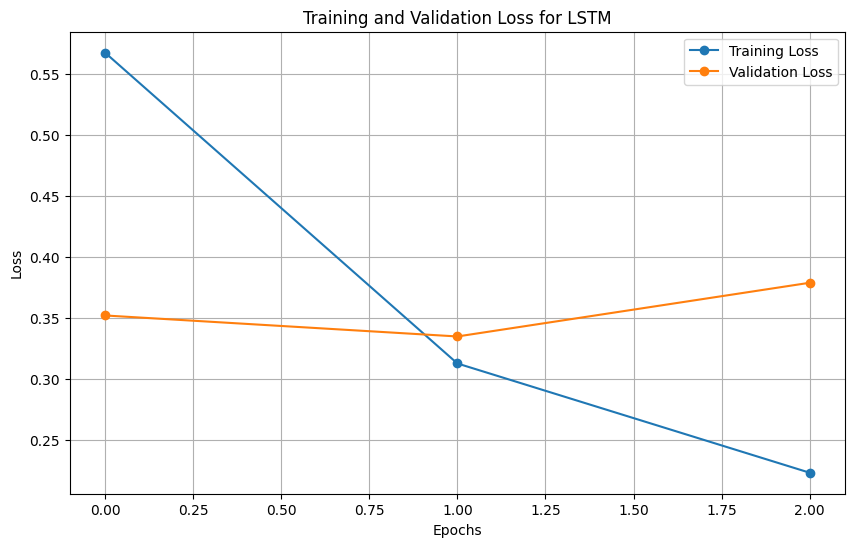

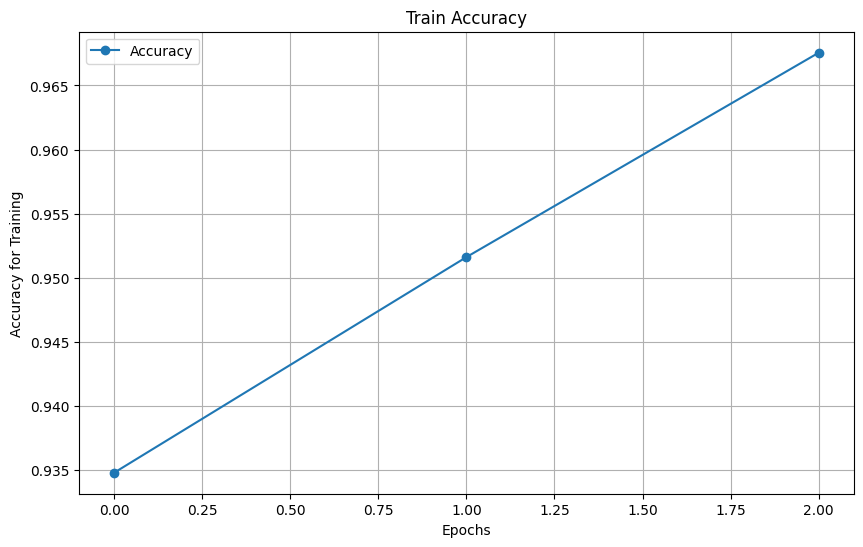

Test Accuracy: 0.9455000162124634


In [ ]:
# Plot training and validation loss
print(history)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss for LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print(history)
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy', marker='o')
plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy for Training')
plt.legend()
plt.grid(True)
plt.show()
print("Test Accuracy:", accuracy)

In [ ]:
# Test output
import pandas as pd
import numpy as np

df = pd.read_csv('test.csv')
df = df.dropna(subset=['question_text'])

# Tokenize and pad the question_content
pred_sequences = tokenizer.texts_to_sequences(df['question_text'])
pred_X = pad_sequences(pred_sequences, maxlen=max_len)

# Make predictions
predictions = model.predict(pred_X)

# Convert predictions to class labels (assuming binary classification)
pred_labels = np.argmax(predictions, axis=1)

# Create the output DataFrame
output_df = pd.DataFrame({
    'qid': df['qid'],
    'prediction': pred_labels
})

# Save to CSV
output_df.to_csv('predictions.csv', index=False)


2809/2809 ━━━━━━━━━━━━━━━━━━━━ 219s 77ms/step


In [ ]:
# Logistic Regression with Hyperparameter Tuning
# import cleaned data
import pandas as pd
import numpy as np

df = pd.read_csv('cleaned_data.csv', nrows = 100000)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer()  # or CountVectorizer()
df = df.dropna(subset=['cleaned_text'])
df = df.dropna(subset=['target'])
X = vectorizer.fit_transform(df['cleaned_text'])

# Apply dimensionality reduction
n_components = 100  # Choose the number of dimensions you want to keep
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced = svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, df['target'], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

param_grid = {
    'C': np.logspace(-4, 4, 10),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
}

# Set up GridSearchCV
model = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated score: ", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report and confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best parameters found:  {'C': 0.3593813663804626, 'penalty': 'l2'}
Best cross-validated score:  0.9390934667083464
[[18742    70]
 [ 1079   103]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18812
           1       0.60      0.09      0.15      1182

    accuracy                           0.94     19994
   macro avg       0.77      0.54      0.56     19994
weighted avg       0.92      0.94      0.92     19994



[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


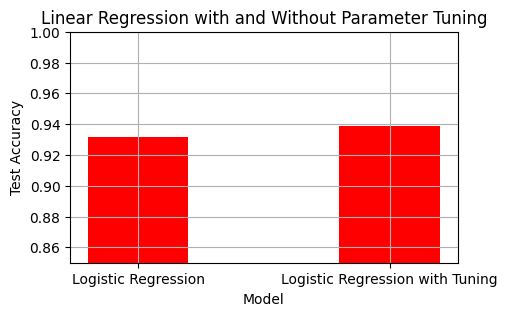

In [ ]:
print(np.logspace(-4,4,10))
#Graph for performances
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Logistic Regression': 0.9315,
        'Logistic Regression with Tuning': 0.9391 }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 3))

# creating the bar plot
plt.grid()
plt.bar(courses, values, color ='red',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.85, 1)
plt.title("Linear Regression with and Without Parameter Tuning")
plt.show()

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


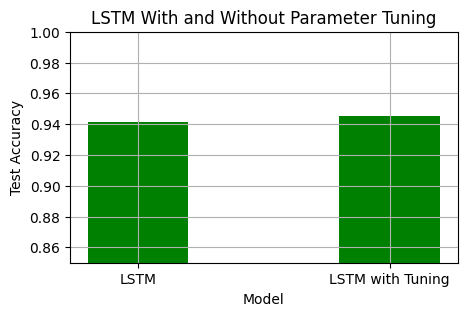

In [ ]:
print(np.logspace(-4,4,10))
#Graph for performances
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'LSTM': 0.9413,
        'LSTM with Tuning': 0.9455 }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 3))

# creating the bar plot
plt.grid()
plt.bar(courses, values, color ='green',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.85, 1)
plt.title("LSTM With and Without Parameter Tuning")
plt.show()

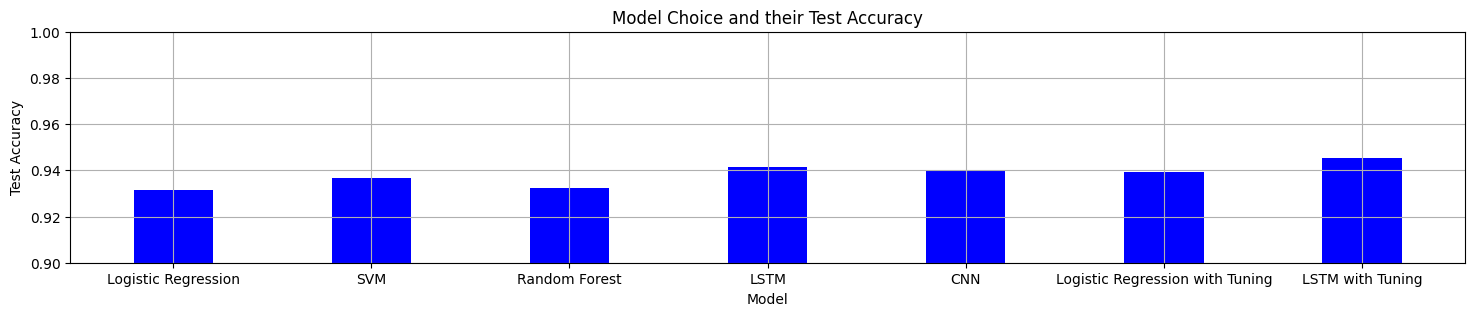

In [ ]:
#Graph for performances
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Logistic Regression': 0.9315, 'SVM': 0.9365, 'Random Forest': 0.9325, 'LSTM': 0.9413, 'CNN': 0.9400,
        'Logistic Regression with Tuning': 0.9391, 'LSTM with Tuning': 0.9455 }
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (18, 3))

# creating the bar plot
plt.grid()
plt.bar(courses, values, color ='blue',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.90, 1)
plt.title("Model Choice and their Test Accuracy")
plt.show()